# Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:
train_data = pd.read_csv('fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
test_data = pd.read_csv('fraudTest.csv')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Concating the dataset into one

In [6]:
data = pd.concat([train_data,test_data])

In [7]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

# Checking the duplicate value in dataset 

In [9]:
data.duplicated().sum()

0

# Checking the null value in the dataset 

In [10]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Taking only 100,000 data point to make it easier for computation 

In [11]:
data = data.head(100000)

In [12]:
data.is_fraud.value_counts()

0    99010
1      990
Name: is_fraud, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

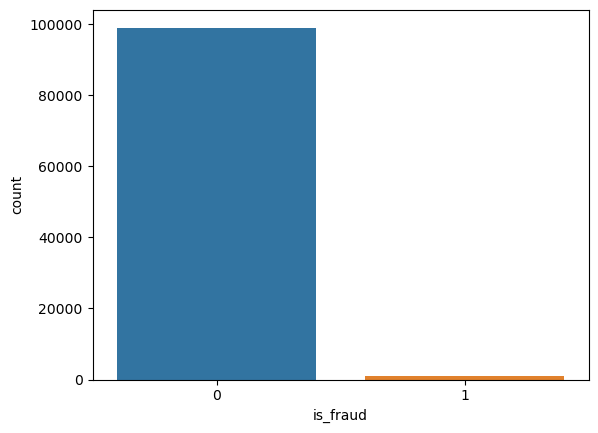

In [13]:
sns.countplot(x='is_fraud',data=data)

# Converting the trans_data_trans_time into datetime

In [14]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [15]:
data['hour'] = data['trans_date_trans_time'].dt.hour

In [16]:
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

In [17]:
data['month'] = data['trans_date_trans_time'].dt.month

# Droping the column that not requried

In [18]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day_of_week', 'month'],
      dtype='object')

In [19]:
data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'merchant',
    'first', 'last', 'street', 'city', 'state', 'zip',
       'job', 'dob', 'trans_num'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data['category'] = encoder.fit_transform(data[['category']])

In [21]:
data['gender'] = data['gender'].map({'M':0,'F':1})

In [22]:
x = data.drop(columns='is_fraud',axis=1)
y = data['is_fraud']

# applying Standarscaler on features

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
col = ['amt', 'lat', 'long', 'city_pop',  'unix_time','merch_lat', 'merch_long', ]
x[col] = scaler.fit_transform(x[col])

In [25]:
x.head()

,cc_num,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,day_of_week,month
0,2703186189652095,8.0,-0.458812,1,-0.484472,0.653627,-0.284149,-1.740782,-0.494753,0.590023,0,1,1
1,630423337322,4.0,0.242105,1,2.038121,-2.035361,-0.295244,-1.740764,2.077950,-2.031837,0,1,1
2,38859492057661,0.0,1.015813,0,0.717250,-1.603430,-0.281963,-1.740759,0.902260,-1.594211,0,1,1
3,3534093764340240,2.0,-0.184436,0,1.514814,-1.592669,-0.289308,-1.740742,1.662194,-1.623709,0,1,1
4,375534208663984,9.0,-0.205273,0,-0.023260,0.778170,-0.295409,-1.740667,0.026471,0.837846,0,1,1


# Model Selection 

In [26]:
model_result = {}

# Spliting the data into training and testing 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 13), (20000, 13), (80000,), (20000,))

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_clf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  98.98


In [33]:
model_result['logisitc'] = accuracy_score(y_test,y_pred)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

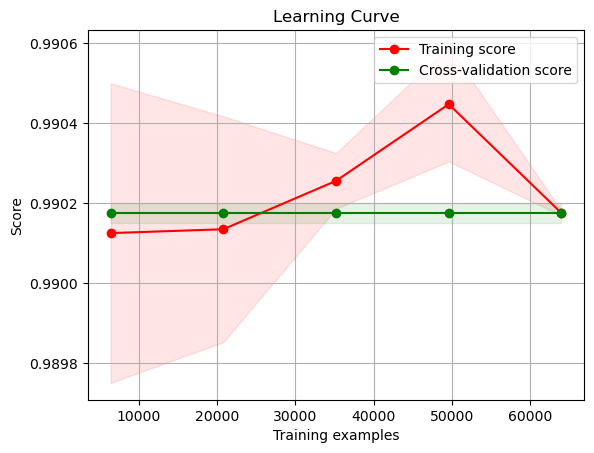

In [34]:
skplt.estimators.plot_learning_curve(log_clf,x_train,y_train)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

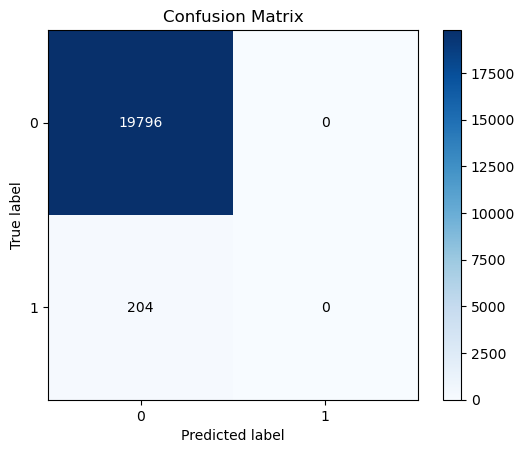

In [35]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

## Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
svm_clf =SVC()
svm_clf.fit(x_train,y_train)

SVC()

In [38]:
y_pred = svm_clf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  98.98


In [39]:
model_result['SVM'] = accuracy_score(y_test,y_pred)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

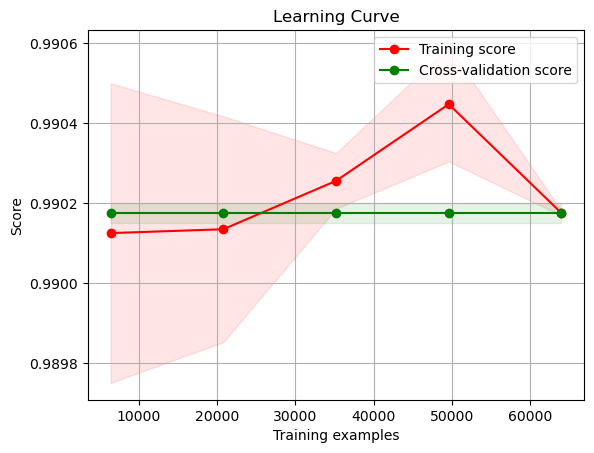

In [40]:
skplt.estimators.plot_learning_curve(svm_clf,x_train,y_train)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

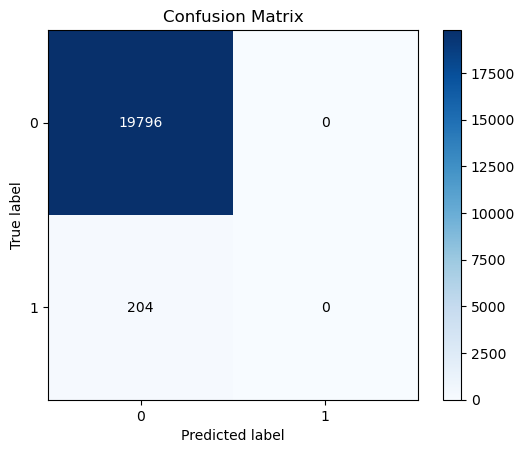

In [41]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

## Decision Tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree = DecisionTreeClassifier(max_depth=50)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50)

In [44]:
y_pred = tree.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  99.455


In [45]:
model_result['Decision Tree'] = accuracy_score(y_test,y_pred)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

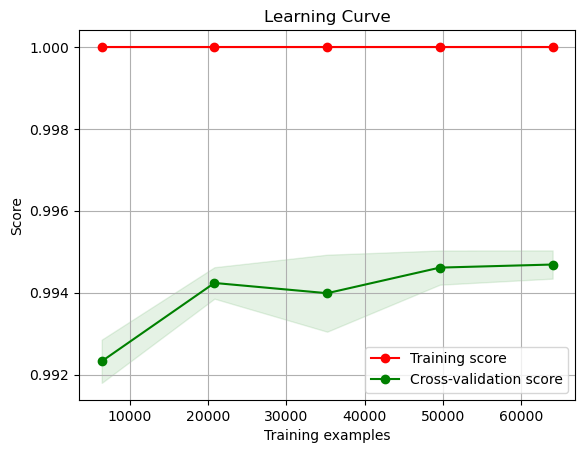

In [46]:

skplt.estimators.plot_learning_curve(tree,x_train,y_train)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

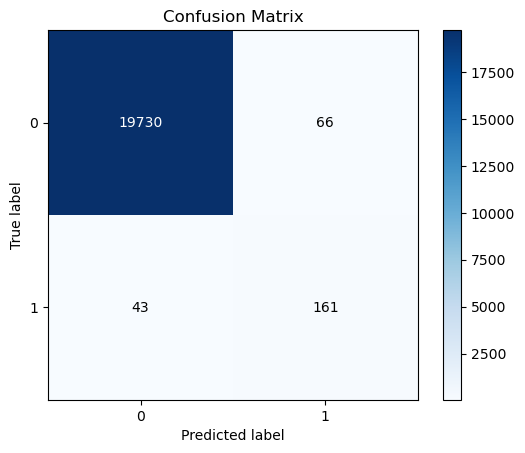

In [47]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [50]:
y_pred = rnd_clf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  99.68


In [51]:
model_result['Random Forest'] = accuracy_score(y_test,y_pred)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

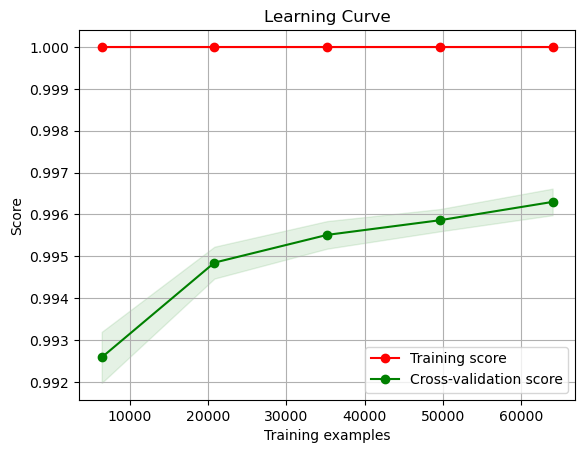

In [52]:
skplt.estimators.plot_learning_curve(rnd_clf,x_train,y_train)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

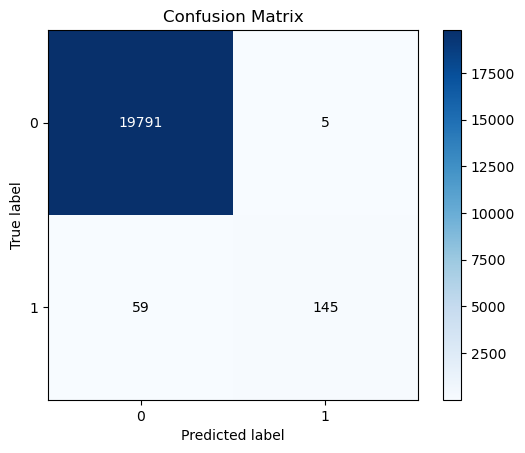

In [53]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

In [54]:
model_result

{'logisitc': 0.9898,
 'SVM': 0.9898,
 'Decision Tree': 0.99455,
 'Random Forest': 0.9968}

In [55]:
data = pd.DataFrame(columns=['Model','Accuracy'])

In [56]:
data['Model'] = model_result.keys()
data['Accuracy'] = model_result.values()

In [57]:
data.head()

,Model,Accuracy
0,logisitc,0.98980
1,SVM,0.98980
2,Decision Tree,0.99455
3,Random Forest,0.99680


<Axes: xlabel='Model', ylabel='Accuracy'>

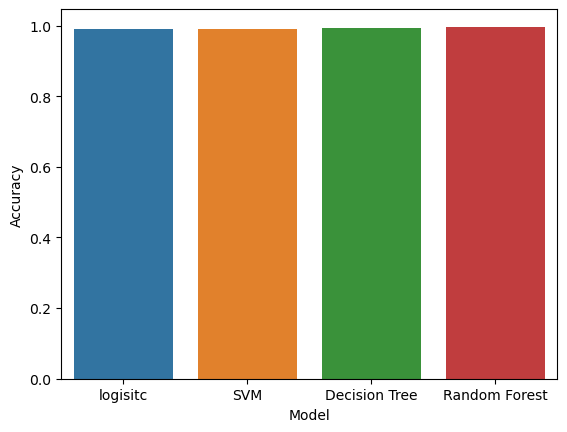

In [58]:
sns.barplot(x='Model',y='Accuracy',data=data)